In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sys
import import_ipynb

## First Load the Data

This data has already been split into training and testing data.
X_train and X_test contain the current population of predator and prey animals and the y_train/y_test data contains the population which we want to predict. We need one set of y_train/y_test for the prey and one for the predator data (because we cannot predict them with the same model).

In [61]:
sys.path.insert(0, r'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research')
from NoiseGenerieren import DatenGenerieren, vsTimePloten, PredvsPrey

In [62]:
def Data_preperation(prey_data,predator_data):

    # Kombinieren Sie die Beutetier- und Raubtierdaten zu einer einzigen Matrix für X_train
    X_train = pd.DataFrame(np.column_stack((prey_data[:-1], predator_data[:-1])), columns=['Prey', 'Predator'])

    # Verwenden Sie die nächste Beutetierpopulation als y_train_prey
    y_train_prey = pd.DataFrame(prey_data[1:], columns=['Prey_next'])
    y_train_predator = pd.DataFrame(predator_data[1:], columns=['predator_next'])
    return X_train, y_train_prey, y_train_predator



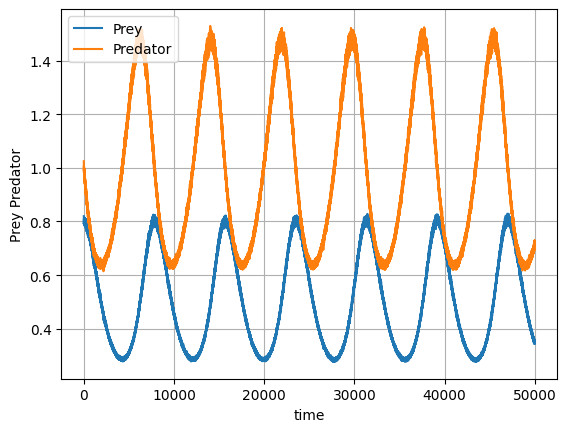

In [63]:
Störung=1
Umdrehungen=10
ProzentderDaten=1
Prey_train, Predator_train, Prey_test, Predator_test = DatenGenerieren(Störung, Umdrehungen, ProzentderDaten)
vsTimePloten(Predator_train,Prey_train)

In [64]:
X_train, y_train_prey, y_train_predator = Data_preperation(Prey_train, Predator_train)
X_test, y_test_prey, y_test_predator = Data_preperation(Prey_test, Predator_test)

In [65]:
X_train

,Prey,Predator
0,1.024733,0.819786
1,0.987986,0.790705
2,0.994443,0.796191
3,0.991288,0.793982
4,1.001160,0.802209
...,...,...
49994,0.728002,0.354804
49995,0.719609,0.350542
49996,0.723980,0.352500
49997,0.712587,0.346783


In [66]:
y_train_prey

,Prey_next
0,0.987986
1,0.994443
2,0.991288
3,1.001160
4,0.992773
...,...
49994,0.719609
49995,0.723980
49996,0.712587
49997,0.717035


In [67]:
#X_train = pd.read_csv("X_train_LV.csv", index_col =0)
#X_test = pd.read_csv("X_test_LV.csv", index_col =0)

# Predicting Prey
#y_train_prey = pd.read_csv("y_train_Prey_LV.csv", index_col =0)
#y_test_prey = pd.read_csv("y_test_Prey_LV.csv", index_col =0)

# Or Predicting Predators
#y_train_predator = pd.read_csv("y_train_Predator_LV.csv", index_col =0)
#y_test_predator = pd.read_csv("y_test_Predator_LV.csv", index_col =0)



In [68]:
X_train

,Prey,Predator
0,1.024733,0.819786
1,0.987986,0.790705
2,0.994443,0.796191
3,0.991288,0.793982
4,1.001160,0.802209
...,...,...
49994,0.728002,0.354804
49995,0.719609,0.350542
49996,0.723980,0.352500
49997,0.712587,0.346783


In [69]:
y_train_prey

,Prey_next
0,0.987986
1,0.994443
2,0.991288
3,1.001160
4,0.992773
...,...
49994,0.719609
49995,0.723980
49996,0.712587
49997,0.717035


## Very Basic Example

A Regression Tree with just one split. Obviously, this is not a good way to predict data. But it gives you the basic lines of code to play around with.

In [70]:
reg_example = tree.DecisionTreeRegressor(max_depth=1)  # This initialises the Regression model and calls it "reg_example"

reg_example.fit(X_train, y_train_prey) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

# Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
y_hat_prey = reg_example.predict(X_test)

# Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
print(mean_squared_error(y_hat_prey,y_test_prey))


0.017249744890250118


## Visualising

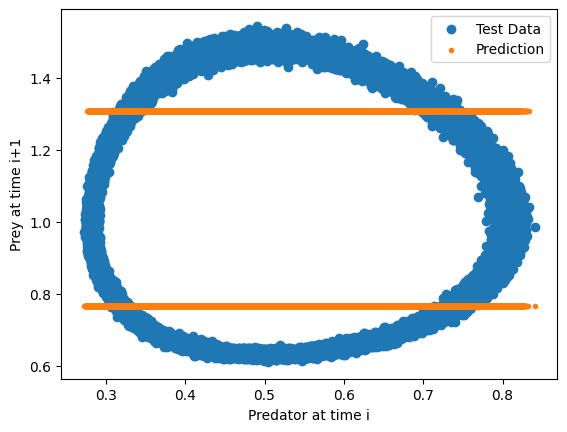

In [71]:
plt.scatter(X_test.Predator, y_test_prey, label="Test Data")
plt.scatter(X_test.Predator, y_hat_prey, marker=".",label="Prediction")
plt.xlabel("Predator at time i")
plt.ylabel("Prey at time i+1")
plt.legend()
plt.show()

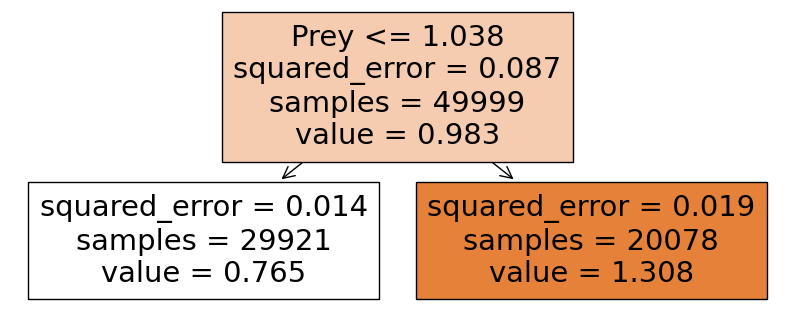

In [72]:
fig = plt.figure(figsize=(10,4)) # How large is the plot?
_ = tree.plot_tree(reg_example,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

# Now the Homework

First predict the prey.

In [73]:
MSEs = list()

for depth in range(1,21):
    
    reg = tree.DecisionTreeRegressor(max_depth= depth)  # change the depth

    reg.fit(X_train, y_train_prey) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

    # Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
    y_hat_prey = reg.predict(X_test)

    # Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
    print(depth, mean_squared_error(y_hat_prey,y_test_prey))
    MSEs += [mean_squared_error(y_hat_prey,y_test_prey)]


1 0.01724974489025008
2 0.0040080773348676775
3 0.0011013407658200375
4 0.00043096694551230053
5 0.0002725285510064753
6 0.0002277674161011186
7 0.0002089198883935066
8 0.00021328732229200414
9 0.00022181831526683847
10 0.00024081513885125896
11 0.0002577310715650212
12 0.00028032056526718313
13 0.000300479724257654
14 0.00030542721293897894
15 0.00032327142085206763
16 0.0003311405645285225
17 0.0003330765075151079
18 0.00034069848502550756
19 0.0003497755501681996
20 0.00034760350312937094


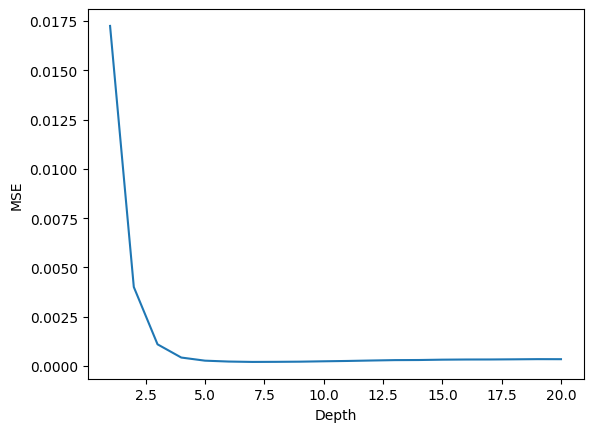

In [74]:
plt.plot(np.arange(1,21,1), MSEs)
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

Apparently, depth = 5 is the lowest MSE for predicting the prey. Now look at the predator predictions, too

In [75]:
MSEs = list()

for depth in range(1,21):
    
    reg = tree.DecisionTreeRegressor(max_depth= depth)  # change the depth

    reg.fit(X_train, y_train_predator ) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

    # Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
    y_hat_predator  = reg.predict(X_test)

    # Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
    print(depth, mean_squared_error(y_hat_predator,y_test_predator))
    MSEs += [mean_squared_error(y_hat_predator,y_test_predator)]


1 0.006268212875721512
2 0.0014248658196490756
3 0.0003752391151356588
4 0.0001311053017996684
5 7.266796865656926e-05
6 5.9957839944218455e-05
7 5.560335892420436e-05
8 5.368693795666453e-05
9 5.7553577750517705e-05
10 5.801208527756391e-05
11 6.370849544456143e-05
12 6.720546441152438e-05
13 7.021446341171482e-05
14 7.670287902710569e-05
15 8.032595839643876e-05
16 8.275053730136934e-05
17 8.515549412635593e-05
18 8.601185751538207e-05
19 8.6620797503893e-05
20 8.87719399789513e-05


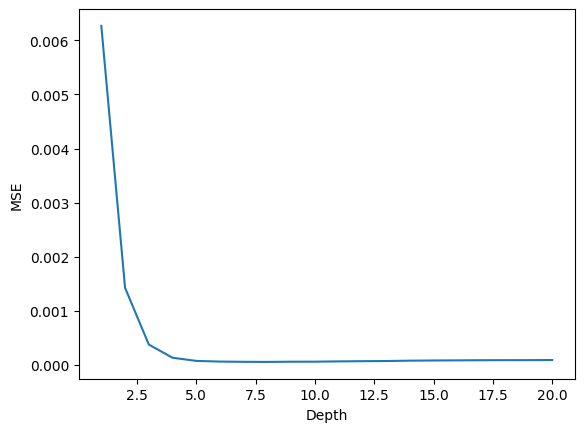

In [76]:
plt.plot(np.arange(1,21,1), MSEs)
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

Here, depth = 4 is supposed to be best here. Let's investigate this further for depth = 1 and depth = 10.

## Visualisation

Visualise the best trees and, as a comparision, a simple tree with depth 1

In [77]:
reg_prey_1 = tree.DecisionTreeRegressor(max_depth=1)
reg_prey = tree.DecisionTreeRegressor(max_depth=5)
reg_predator_1 = tree.DecisionTreeRegressor(max_depth=1)
reg_predator = tree.DecisionTreeRegressor(max_depth=4)


In [78]:
# Training
reg_prey_1.fit(X_train, y_train_prey)
reg_prey.fit(X_train, y_train_prey)
reg_predator_1.fit(X_train, y_train_predator)
reg_predator.fit(X_train, y_train_predator)

DecisionTreeRegressor(max_depth=4)

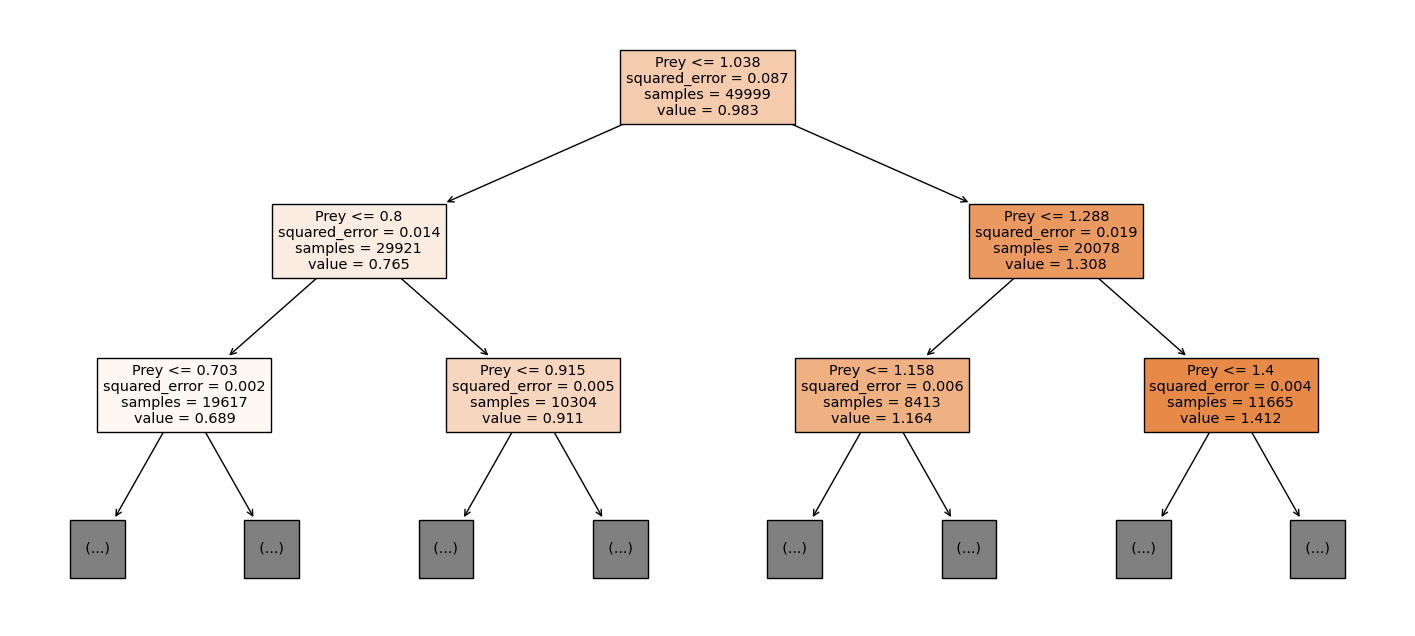

In [79]:
fig = plt.figure(figsize=(18,8)) # How large is the plot?
_ = tree.plot_tree(reg_prey,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

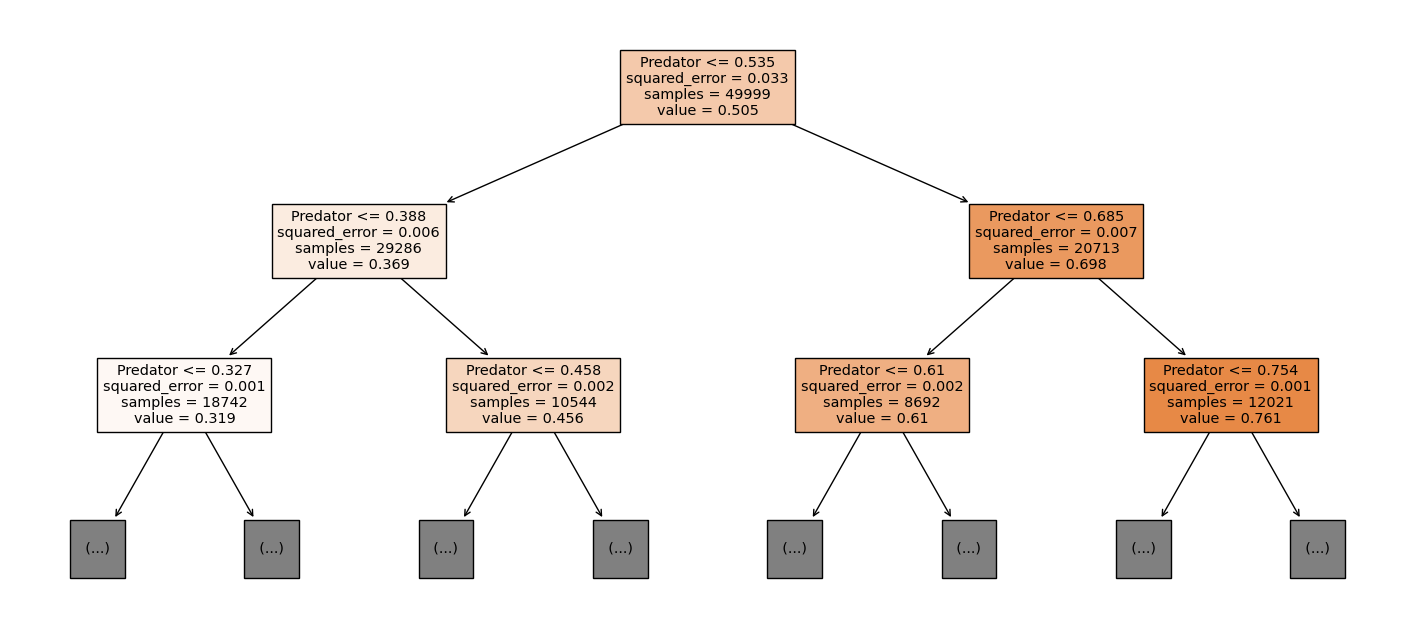

In [80]:
fig = plt.figure(figsize=(18,8)) # How large is the plot?
_ = tree.plot_tree(reg_predator,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

In [81]:
# Prediction
y_hat_prey_1 = reg_prey_1.predict(X_test)
y_hat_prey= reg_prey.predict(X_test)
y_hat_predator_1= reg_predator_1.predict(X_test)
y_hat_predator= reg_predator.predict(X_test)

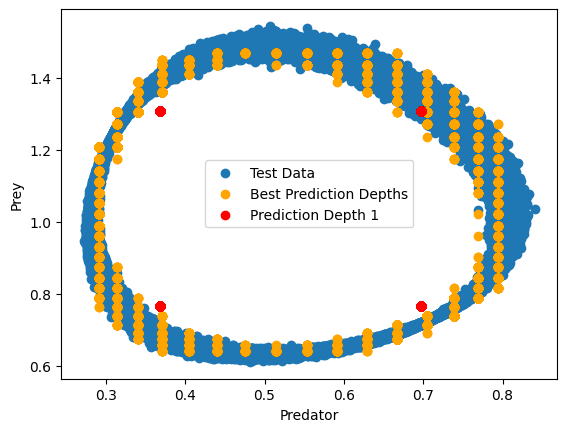

In [82]:
plt.scatter(y_test_predator, y_test_prey, label="Test Data")
plt.scatter(y_hat_predator, y_hat_prey,label="Best Prediction Depths", color = "orange")
plt.scatter(y_hat_predator_1, y_hat_prey_1,label="Prediction Depth 1", color ="red")

plt.xlabel("Predator")
plt.ylabel("Prey")
plt.legend()
plt.show()

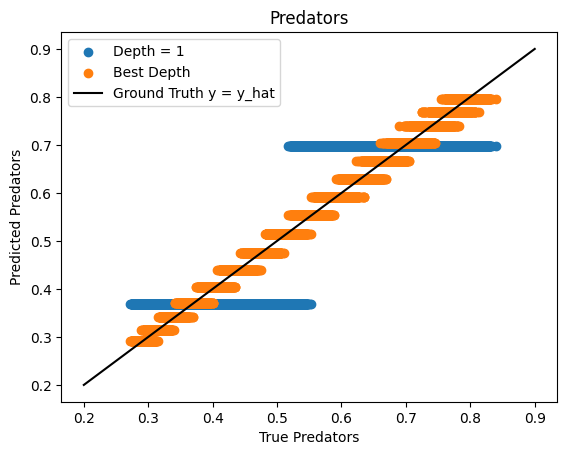

In [83]:
plt.scatter(y_test_predator,y_hat_predator_1, label="Depth = 1")
plt.scatter(y_test_predator,y_hat_predator, label="Best Depth")
plt.plot([0.2,0.9],[0.2,0.9], color ="k", label="Ground Truth y = y_hat")
plt.xlabel("True Predators")
plt.ylabel("Predicted Predators")
plt.title("Predators")
plt.legend()
plt.show()

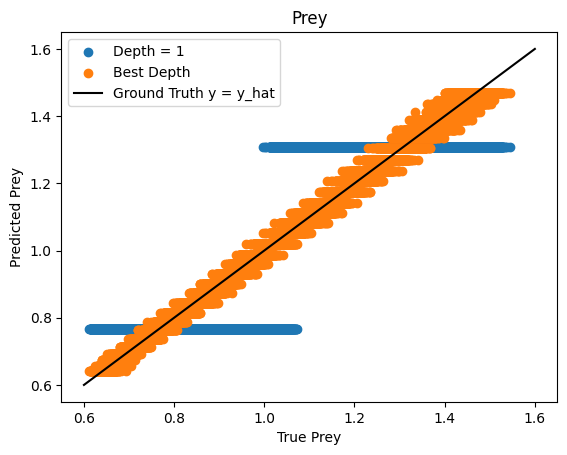

In [84]:
plt.scatter(y_test_prey,y_hat_prey_1, label="Depth = 1")
plt.scatter(y_test_prey,y_hat_prey, label="Best Depth")
plt.plot([0.6,1.6],[0.6,1.6], color ="k", label="Ground Truth y = y_hat")
plt.xlabel("True Prey")
plt.ylabel("Predicted Prey")
plt.title("Prey")
plt.legend()
plt.show()

## Combined Error?

In [85]:
def Error_2D(x1_predict, x2_predict,x1_true, x2_true):
    
    diff_x1 = x1_predict - x1_true
    diff_x2 = x2_predict - x2_true
   
    return(np.mean(diff_x1**2 + diff_x2**2))

In [86]:
Error_2D(y_test_prey.to_numpy().flatten(),
       y_test_predator.to_numpy().flatten(), 
       y_hat_prey_1.flatten(),
       y_hat_predator_1.flatten() )

0.02351795776597159

In [87]:
Error_2D(y_test_prey.to_numpy().flatten(),
       y_test_predator.to_numpy().flatten(),
       y_hat_prey.flatten(),
       y_hat_predator.flatten() )

0.00040363385280615195

# Ensemble Methods

## Bagging: Prey

In [88]:
for depth in range(1,8):
    bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=depth),
                            n_estimators=100)
    bag_clf.fit(X_train, y_train_prey.values.ravel())
    y_bag_prey = bag_clf.predict(X_test)

    print("\n Error for depth", depth,":", np.round( mean_squared_error(y_bag_prey,y_test_prey),4))


 Error for depth 1 : 0.0168

 Error for depth 2 : 0.0038

 Error for depth 3 : 0.001

 Error for depth 4 : 0.0004

 Error for depth 5 : 0.0002

 Error for depth 6 : 0.0002

 Error for depth 7 : 0.0002


In [89]:
## "Best" model
bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=3),
                            n_estimators=100)
bag_clf.fit(X_train, y_train_prey.values.ravel())
y_bag_prey = bag_clf.predict(X_test)

So depths larger than 3 do not improve our model in any meaningful way.

## Bagging: Predator


In [90]:
for depth in range(1,8):
    bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=depth),
                            n_estimators=100)
    bag_clf.fit(X_train, y_train_predator.values.ravel())
    y_bag_predator = bag_clf.predict(X_test)

    print("\n Error for depth", depth,":", np.round( mean_squared_error(y_bag_predator,y_test_predator),4))


 Error for depth 1 : 0.0062

 Error for depth 2 : 0.0014

 Error for depth 3 : 0.0003

 Error for depth 4 : 0.0001

 Error for depth 5 : 0.0001

 Error for depth 6 : 0.0001

 Error for depth 7 : 0.0


Similar: Depth > 4 makes little difference

In [91]:
## "Best" model
bag_clf = BaggingRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", # simple base classifier
                                                                 max_depth=4),
                            n_estimators=100)
bag_clf.fit(X_train, y_train_predator.values.ravel())
y_bag_predator = bag_clf.predict(X_test)

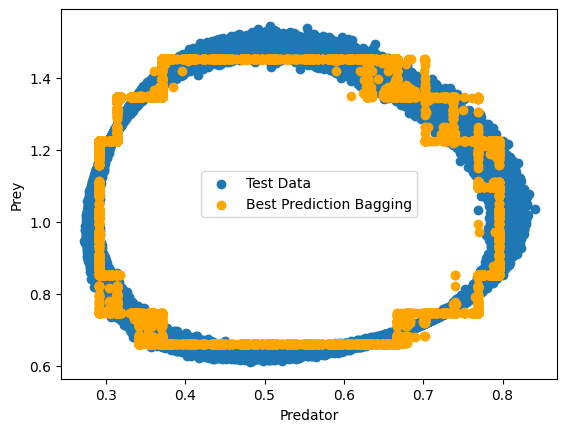

In [92]:
plt.scatter(y_test_predator, y_test_prey, label="Test Data")
plt.scatter(y_bag_predator, y_bag_prey,label="Best Prediction Bagging", color = "orange")

plt.xlabel("Predator")
plt.ylabel("Prey")
plt.legend()
plt.show()

## Boosting: Prey

Now iterate over different depths and learning_rates

In [93]:
for depth in range(1,4):
    for learning_rate in [0.01, 0.1, 1]:
        reg_boost = GradientBoostingRegressor(max_depth = depth,n_estimators=100, 
                                              learning_rate = learning_rate)
        reg_boost.fit(X_train, y_train_prey.values.ravel())
        y_boost_prey = reg_boost.predict(X_test)
        print("\n Error for depth", depth," and learning_rate",learning_rate,":", 
              np.round( mean_squared_error(y_boost_prey,y_test_prey),4))


 Error for depth 1  and learning_rate 0.01 : 0.0214

 Error for depth 1  and learning_rate 0.1 : 0.0003

 Error for depth 1  and learning_rate 1 : 0.0004

 Error for depth 2  and learning_rate 0.01 : 0.0138

 Error for depth 2  and learning_rate 0.1 : 0.0002

 Error for depth 2  and learning_rate 1 : 0.0002

 Error for depth 3  and learning_rate 0.01 : 0.0126

 Error for depth 3  and learning_rate 0.1 : 0.0002

 Error for depth 3  and learning_rate 1 : 0.0002


Depth 1 and learning_rate = 0.1 seem to be alright

In [94]:
reg_boost = GradientBoostingRegressor(max_depth = 1,
                                      n_estimators=100,
                                      learning_rate = 0.1)
reg_boost.fit(X_train, y_train_prey.values.ravel())
y_boost_prey = reg_boost.predict(X_test)

## Boosting: Predators

Also iterate over both hyperparameters

In [95]:
for depth in range(1,4):
    for learning_rate in [0.01, 0.1, 1]:
        reg_boost = GradientBoostingRegressor(max_depth = depth,n_estimators=100, learning_rate = learning_rate)
        reg_boost.fit(X_train, y_train_predator.values.ravel())
        y_boost_predator = reg_boost.predict(X_test)
        print("\n Error for depth", depth," and learning_rate",learning_rate,":", 
              np.round( mean_squared_error(y_boost_predator,y_test_predator),4))


 Error for depth 1  and learning_rate 0.01 : 0.0085

 Error for depth 1  and learning_rate 0.1 : 0.0001

 Error for depth 1  and learning_rate 1 : 0.0001

 Error for depth 2  and learning_rate 0.01 : 0.0054

 Error for depth 2  and learning_rate 0.1 : 0.0001

 Error for depth 2  and learning_rate 1 : 0.0001

 Error for depth 3  and learning_rate 0.01 : 0.0048

 Error for depth 3  and learning_rate 0.1 : 0.0

 Error for depth 3  and learning_rate 1 : 0.0001


Here, depth 2 and learning_rate 0.1 is notably better than depth 1 and only very slightly worse than depth 3

In [96]:
reg_boost = GradientBoostingRegressor(max_depth = 2,
                                      n_estimators=100,
                                      learning_rate = 0.1)
reg_boost.fit(X_train, y_train_predator.values.ravel())
y_boost_predator = reg_boost.predict(X_test)

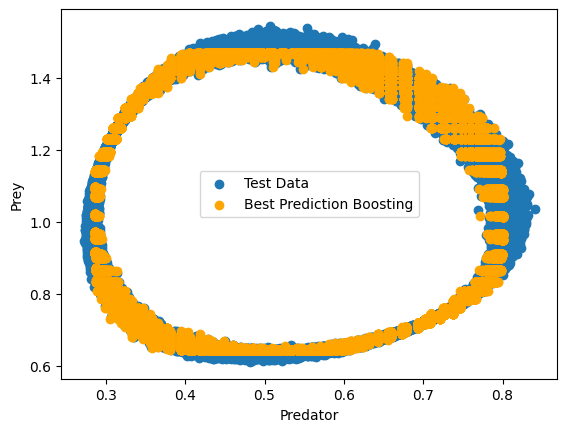

In [97]:
plt.scatter(y_test_predator, y_test_prey, label="Test Data")
plt.scatter(y_boost_predator, y_boost_prey,label="Best Prediction Boosting", color = "orange")

plt.xlabel("Predator")
plt.ylabel("Prey")
plt.legend()
plt.show()